<a href="https://colab.research.google.com/github/Jason-Adam/msds-462/blob/master/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MSDS-462 Week 1: Fashion MNIST Classification  
Objective: Build a classification model on the Kaggle Fashion MNIST Data Set 

# Initial Imports & Data Ingest

## Initial Imports

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import layers

## Wire Up Gdrive

In [2]:
# Mount Gdrive
from google.colab import drive
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
!ls /content/gdrive/My\ Drive/data/fashion_mnist/

fashion-mnist_test.csv	 t10k-images-idx3-ubyte  train-images-idx3-ubyte
fashion-mnist_train.csv  t10k-labels-idx1-ubyte  train-labels-idx1-ubyte


## Data Ingest

In [ ]:
train_df = pd.read_csv("/content/gdrive/My Drive/data/fashion_mnist/fashion-mnist_train.csv")
test_df = pd.read_csv("/content/gdrive/My Drive/data/fashion_mnist/fashion-mnist_test.csv")

In [5]:
print(train_df.shape)
print(test_df.shape)

(60000, 785)
(10000, 785)


### Split Training Data  
* Split the training into train and validate  
* Split out X and y from each dataset (format needed for model)

In [ ]:
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

# Separate dependent and independent vars
X = np.array(train_df.iloc[:, 1:])
y = tf.keras.utils.to_categorical(np.array(train_df.iloc[:, 0]))

# Split out validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

#Test data
X_test = np.array(test_df.iloc[:, 1:])
y_test = tf.keras.utils.to_categorical(np.array(test_df.iloc[:, 0]))

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)

# Convert to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')

In [7]:
# Validate reshaping
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(48000, 28, 28, 1)
(12000, 28, 28, 1)
(10000, 28, 28, 1)


In [8]:
# Validate reshaping
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(48000, 10)
(12000, 10)
(10000, 10)


# EDA

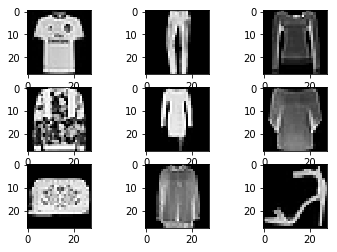

In [35]:
# Sample Plots
for num in range(0, 9):
    plt.subplot(3, 3, num+1)
    plt.imshow(X_test[num].reshape(28, 28), cmap="gray")

In [41]:
!pip list | grep pandas

pandas                   0.24.2               
pandas-datareader        0.7.4                
pandas-gbq               0.4.1                
pandas-profiling         1.4.1                
sklearn-pandas           1.8.0                


In [ ]:
!pip install pandas==0.25.1

In [42]:
train_df.groupby(["label"]).agg(
    {
        "label": "count"
    }
)

,label
label,
0,6000
1,6000
2,6000
3,6000
4,6000
5,6000
6,6000
7,6000
8,6000


# Modeling  

## First Model: 2 Convolutional Layers

In [9]:
# Model Params
BATCH_SIZE = 256
NUM_CLASSES = 10
EPOCHS = 50

# Instantiate model object
model = tf.keras.models.Sequential()

# First Convolutional Layer
model.add(layers.Conv2D(
    filters=32, 
    kernel_size=(3, 3), 
    activation="relu",
    input_shape=input_shape)
)
model.add(layers.MaxPool2D())
model.add(layers.Dropout(0.2))

# Second Conv Layer
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model.add(layers.MaxPool2D())
model.add(layers.Dropout(0.2))

# Flatten
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(NUM_CLASSES, activation="softmax"))

# Compile
model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.RMSprop(),
    metrics=["accuracy"]
    )

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0

In [11]:
# Fit model
m1_history = model.fit(
    x=X_train,
    y=y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_val, y_val)
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 5s 115us/sample - loss: 1.7503 - acc: 0.6817 - val_loss: 0.4708 - val_acc: 0.8238
Epoch 2/50
48000/48000 [==============================] - 3s 57us/sample - loss: 0.4512 - acc: 0.8354 - val_loss: 0.3735 - val_acc: 0.8667
Epoch 3/50
48000/48000 [==============================] - 3s 57us/sample - loss: 0.3722 - acc: 0.8634 - val_loss: 0.3441 - val_acc: 0.8683
Epoch 4/50
48000/48000 [==============================] - 3s 58us/sample - loss: 0.3358 - acc: 0.8774 - val_loss: 0.3233 - val_acc: 0.8817
Epoch 5/50
48000/48000 [==============================] - 3s 57us/sample - loss: 0.3091 - acc: 0.8854 - val_loss: 0.3114 - val_acc: 0.8886
Epoch 6/50
48000/48000 [==============================] - 3s 56us/sample - loss: 0.2974 - acc: 0.8900 - val_loss: 0.2937 - val_acc: 0.8923
Epoch 7/50
48000/48000 [==============================] - 3s 57us/sample - loss: 0.2770 - acc: 0.8974 - val_loss: 0

In [12]:
m1_score = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 105us/sample - loss: 0.2794 - acc: 0.9068


In [ ]:
def plot_accuracy(history):
    # Accuracy
    plt.plot(range(len(history.history["acc"])), history.history["acc"], "bo", label="Training Accuracy")
    plt.plot(range(len(history.history["acc"])), history.history["val_acc"], "g", label="Validation Accuracy")
    plt.title("Training vs Validation Accuracy")
    plt.legend()
    # Loss
    plt.figure()
    plt.plot(range(len(history.history["acc"])), history.history["loss"], "bo", label="Training Loss")
    plt.plot(range(len(history.history["acc"])), history.history["val_loss"], "g", label="Validation Loss")
    plt.title("Training vs Validation Loss")
    plt.legend()

    plt.show()

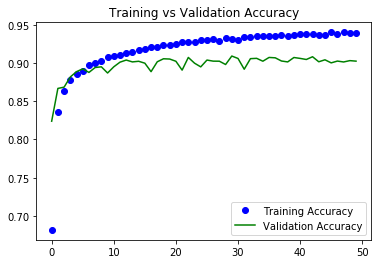

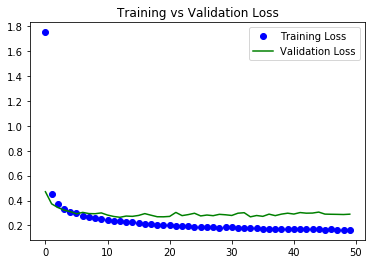

In [23]:
plot_accuracy(m1_history)

It's obvious from the graphs that my validation accuracy didn't improve much beyond 20 epochs. Neither did the loss. I'll attempt to add an additional convolutional layer and reduce the number of epochs. I'll also adjust the dropout rate to see if that has any affect on the accuracy.

## Second Model: 3 Convolutional Layers

In [ ]:
# model_2 Params
BATCH_SIZE = 256
NUM_CLASSES = 10
EPOCHS = 20

# Instantiate model_2 object
model_2 = tf.keras.models.Sequential()

# First Convolutional Layer
model_2.add(layers.Conv2D(
    filters=32, 
    kernel_size=(3, 3), 
    activation="relu",
    input_shape=input_shape)
)
model_2.add(layers.MaxPool2D())
model_2.add(layers.Dropout(0.2))

# Second Conv Layer
model_2.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model_2.add(layers.MaxPool2D())
model_2.add(layers.Dropout(0.2))

# Second Conv Layer
model_2.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation="relu"))
model_2.add(layers.MaxPool2D())
model_2.add(layers.Dropout(0.2))

# Flatten
model_2.add(layers.Flatten())
model_2.add(layers.Dense(128, activation="relu"))
model_2.add(layers.Dense(64, activation="relu"))
model_2.add(layers.Dense(NUM_CLASSES, activation="softmax"))

# Compile
model_2.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.RMSprop(),
    metrics=["accuracy"]
    )

In [25]:
# Fit model
m2_history = model_2.fit(
    x=X_train,
    y=y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_val, y_val)
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 4s 78us/sample - loss: 1.6613 - acc: 0.6015 - val_loss: 0.6491 - val_acc: 0.7670
Epoch 2/20
48000/48000 [==============================] - 3s 70us/sample - loss: 0.6324 - acc: 0.7670 - val_loss: 0.4967 - val_acc: 0.8137
Epoch 3/20
48000/48000 [==============================] - 3s 69us/sample - loss: 0.5270 - acc: 0.8084 - val_loss: 0.4377 - val_acc: 0.8362
Epoch 4/20
48000/48000 [==============================] - 3s 69us/sample - loss: 0.4770 - acc: 0.8268 - val_loss: 0.4110 - val_acc: 0.8464
Epoch 5/20
48000/48000 [==============================] - 3s 68us/sample - loss: 0.4467 - acc: 0.8382 - val_loss: 0.4157 - val_acc: 0.8488
Epoch 6/20
48000/48000 [==============================] - 3s 68us/sample - loss: 0.4193 - acc: 0.8464 - val_loss: 0.3787 - val_acc: 0.8598
Epoch 7/20
48000/48000 [==============================] - 3s 70us/sample - loss: 0.4007 - acc: 0.8536 - val_loss: 0.

In [26]:
m2_score = model_2.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 117us/sample - loss: 0.3137 - acc: 0.8865


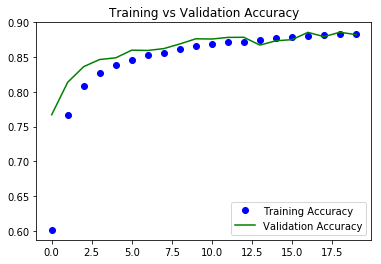

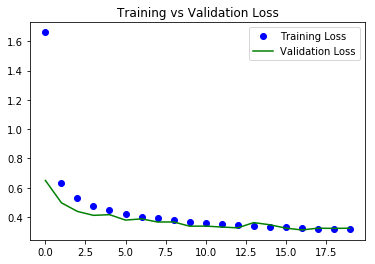

In [27]:
plot_accuracy(m2_history)

# Conclusions / Recommendations  
Overall, a very simple model architecture can produce accurate predictions of various clothing items. I would recommend to continue exploring model architecture in order to increase the accuracy without sacrificing an extensive amount of training time. It was evident that a relatively small number of epochs is needed to reach a plateau of sorts.